In [1]:
from fastai.learner import load_learner
from PIL import Image

In [2]:
model_path = r'D:\jupyter\Diploma\FinalFolder\cat_resnet34_export.pkl'
learn = load_learner(model_path)

39 dress=41


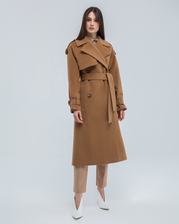

In [6]:
img=Image.open(r'D:\jupyter\Diploma\captured_image.jpg')
img.thumbnail((224,224),Image.LANCZOS)
prediction = learn.predict(img)
print(prediction[0],'dress=41')
display(img)

In [10]:
path_labels = np.load('C:/Users/USRx/Desktop/Daria/category_img_new.npy',allow_pickle=True)
df = pd.DataFrame(path_labels, columns=['path','label'])

In [11]:
test_df = df.sample(5000)

In [24]:
accuracy_full = 0
total_images = len(test_df)

for i in range(total_images):
    img = Image.open(test_df.iloc[i]['path']).convert('RGB').resize((224, 224))
    with learn.no_bar(), learn.no_logging():
        prediction = learn.predict(img)
    predicted_class = int(prediction[0])
    actual_label = int(test_df.iloc[i]['label'])
    
    if actual_label == predicted_class:
        accuracy_full += 1
average_accuracy = accuracy_full / total_images
print(f"Average Accuracy: {average_accuracy * 100:.2f}%")

Average Accuracy: 70.78%
